# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
data_path = 'simulated_transaction_2024.csv'
df = pd.read_csv(data_path)

# Remove duplicate entries
df = df.drop_duplicates()

# Convert data types - treating account numbers as strings to preserve leading zeros if any
df['Account No'] = df['Account No'].astype(str)
df['Third Party Account No'] = df['Third Party Account No'].astype(str)

# Handle missing values in 'Third Party Name'
# If 'Third Party Name' is NaN and 'Third Party Account No' is numeric, mark as "Transfer"
df.loc[df['Third Party Name'].isnull() & df['Third Party Account No'].str.isnumeric(), 'Third Party Name'] = 'Transfer'

# Display the first few rows of the preprocessed data
print(df.head())


         Date Timestamp   Account No  Balance  Amount Third Party Account No  \
0  01/01/2023     00:00  678330503.0   2971.0  1584.0                    nan   
1  01/01/2023     00:00  472213568.0   3792.0  1950.0                    nan   
2  01/01/2023     00:00  472213568.0   3012.0  -780.0            283027736.0   
3  01/01/2023     00:00  283027736.0   1787.0   780.0            472213568.0   
4  01/01/2023     00:00  624500124.0   3226.0  1825.0                    nan   

     Third Party Name  
0  Westport Care Home  
1    Barbiee Boutique  
2                 NaN  
3                 NaN  
4            Fat Face  


In [2]:
df

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.000000,1584.00,nan,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.000000,1950.00,nan,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.000000,780.00,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.000000,1825.00,nan,Fat Face
...,...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,nan,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,nan,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,nan,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,nan,Amazon


In [3]:
# Check the 'Account No' column for missing values
missing_account_values = df['Account No'].isnull().sum()

if missing_account_values == 0:
    print("No missing value was found for the 'Account No' column.")
else:
    print(f"A missing value {missing_account_values} was found in column 'Account No'.")


No missing value was found for the 'Account No' column.


In [5]:
# Ensure 'Date' column is of datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Calculate total outflow for each account for each month (assuming outflow is negative in the Amount column)
monthly_outflow = df[df['Amount'] < 0].groupby(['Account No', 'YearMonth'])['Amount'].sum().reset_index()
monthly_outflow.columns = ['Account No', 'YearMonth', 'Monthly_Outflow']

# Convert outflow to positive values since outflows are typically recorded as negative
monthly_outflow['Monthly_Outflow'] = monthly_outflow['Monthly_Outflow'].abs()

# First calculate total number of months for each account for averaging
months_per_account = monthly_outflow.groupby('Account No').size()

# Calculate total outflow for each account (now in positive values)
total_outflow_per_account = monthly_outflow.groupby('Account No')['Monthly_Outflow'].sum()

# Calculate average monthly consumption (positive values)
monthly_avg_consumption = (total_outflow_per_account / months_per_account).reset_index()
monthly_avg_consumption.columns = ['Account No', 'Average Monthly Consumption']

# Display the average monthly consumption for each account along with corresponding levels
print(monthly_avg_consumption)


      Account No  Average Monthly Consumption
0    101531259.0                  1468.965000
1    104832000.0                  2092.960000
2    105375973.0                   841.147500
3    106601471.0                   648.000000
4    108481285.0                  1255.423333
..           ...                          ...
972  996042490.0                  2939.000833
973  998390769.0                  1938.486364
974  998405607.0                   734.680000
975  999752672.0                  2549.189167
976          nan                  1286.454167

[977 rows x 2 columns]


C:\Users\郭程鹏\AppData\Local\Temp\ipykernel_31040\1215489247.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
# Check for nan values in the Account No column in the original data
print("Number of nan values in the Account No column in the original data:", df['Account No'].isnull().sum())

# Ensure that there are no nan values introduced when calculating the total number of months for each account
print("Number of nan values in the grouped account month count:", months_per_account.isnull().sum())

# Check if there are any nan values when calculating the total expenditure for each account
print("Number of nan values in the grouped account total outflow:", total_outflow_per_account.isnull().sum())

# Check for nan values in the final monthly average consumption
print("Number of nan values in the monthly average consumption:", monthly_avg_consumption['Average Monthly Consumption'].isnull().sum())


Number of nan values in the Account No column in the original data: 0
Number of nan values in the grouped account month count: 0
Number of nan values in the grouped account total outflow: 0
Number of nan values in the monthly average consumption: 0


# Consumption data statistics

# Classification of consumption

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

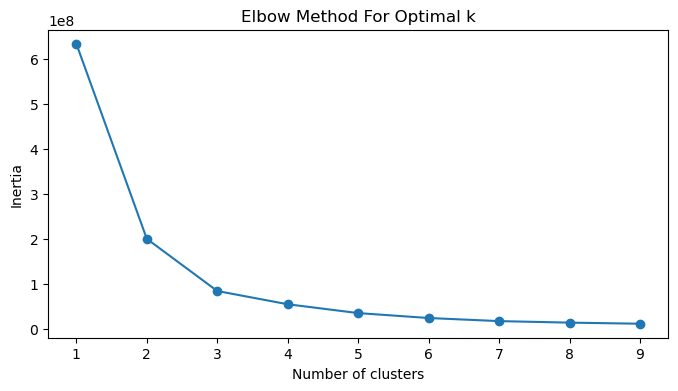

In [7]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(monthly_avg_consumption[['Average Monthly Consumption']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


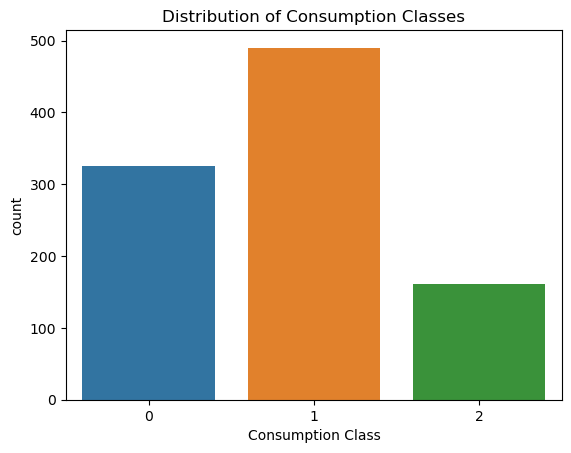

In [8]:
from sklearn.cluster import KMeans
import seaborn as sns

# By observing stability at K=3, it appears to be the optimal value for k
k = 3

# Run KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(monthly_avg_consumption[['Average Monthly Consumption']])
monthly_avg_consumption['Consumption Class'] = kmeans.labels_

# Plot a bar plot of the distribution of consumption classes
sns.countplot(x='Consumption Class', data=monthly_avg_consumption)
plt.title('Distribution of Consumption Classes')
plt.show()


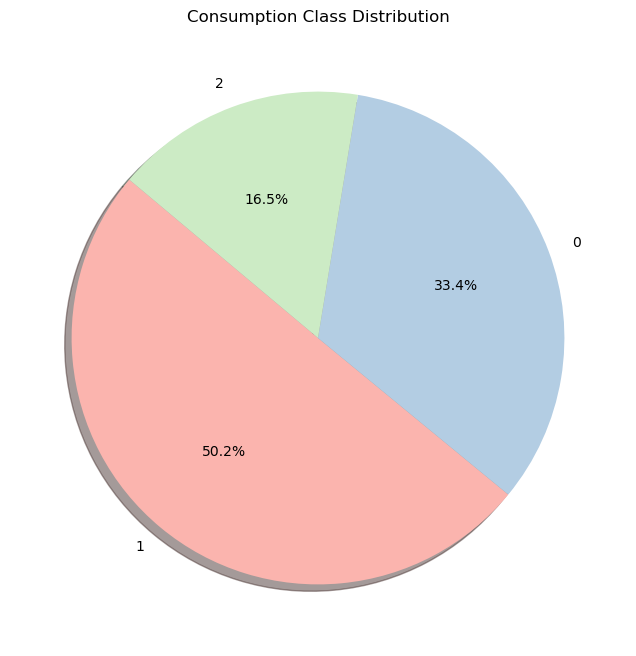

In [9]:
import matplotlib.pyplot as plt

# Calculate the frequency of each consumption class
consumption_class_counts = monthly_avg_consumption['Consumption Class'].value_counts()

# Set a color palette for the pie chart
colors = plt.get_cmap('Pastel1').colors

# Plot the pie chart for consumption class distribution
plt.figure(figsize=(8, 8))
plt.pie(consumption_class_counts, 
        labels=consumption_class_counts.index, 
        autopct='%1.1f%%',    # Show the percentage and format it to 1 decimal place
        startangle=140,       # Start the pie chart at 140 degrees to place the first slice on the left
        colors=colors,        # Use the pastel color palette
        shadow=True)          # Add a shadow for a 3D effect
plt.title('Consumption Class Distribution')
plt.show()


In [10]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

k = 3

# Run KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(monthly_avg_consumption[['Average Monthly Consumption']])
monthly_avg_consumption['Cluster'] = kmeans.labels_

# Get the centroid values for each cluster
cluster_centers = kmeans.cluster_centers_.squeeze()

# Sort the cluster centers and get the indices after sorting
sorted_idx = np.argsort(cluster_centers)

# Create a mapping to map the sorted cluster indices to classes
cluster_to_class = {sorted_idx[0]: 'Low', sorted_idx[1]: 'Medium', sorted_idx[2]: 'High'}

# Convert the clustering results to classes
monthly_avg_consumption['Consumption Class'] = monthly_avg_consumption['Cluster'].map(cluster_to_class)

# Drop the no longer needed Cluster column
monthly_avg_consumption.drop('Cluster', axis=1, inplace=True)

# Display the updated DataFrame
print(monthly_avg_consumption)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


      Account No  Average Monthly Consumption Consumption Class
0    101531259.0                  1468.965000            Medium
1    104832000.0                  2092.960000            Medium
2    105375973.0                   841.147500               Low
3    106601471.0                   648.000000               Low
4    108481285.0                  1255.423333            Medium
..           ...                          ...               ...
972  996042490.0                  2939.000833              High
973  998390769.0                  1938.486364            Medium
974  998405607.0                   734.680000               Low
975  999752672.0                  2549.189167              High
976          nan                  1286.454167            Medium

[977 rows x 3 columns]


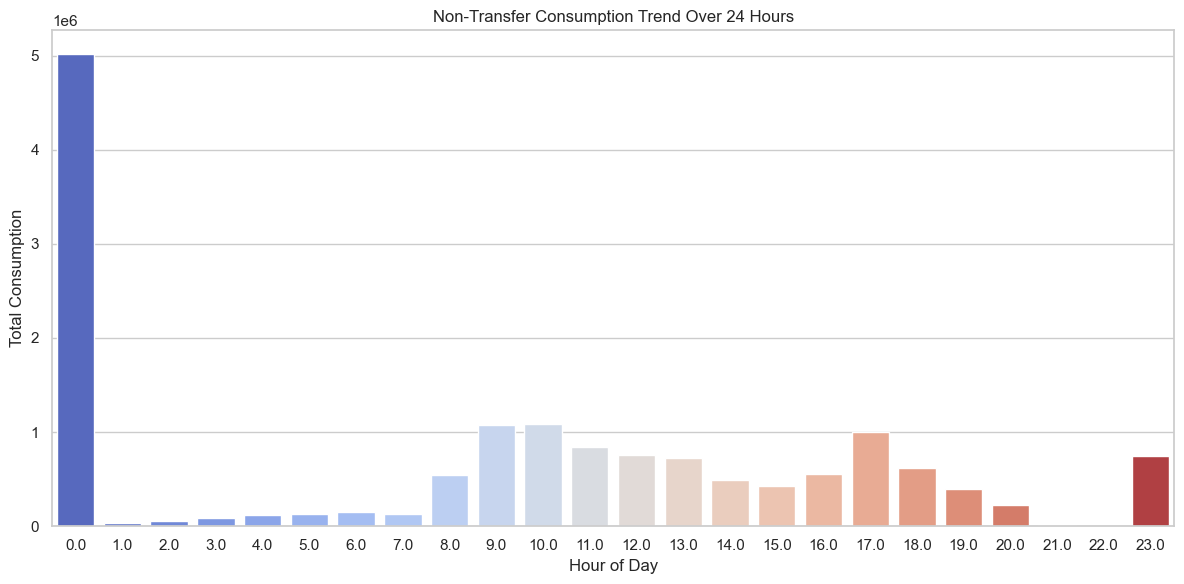

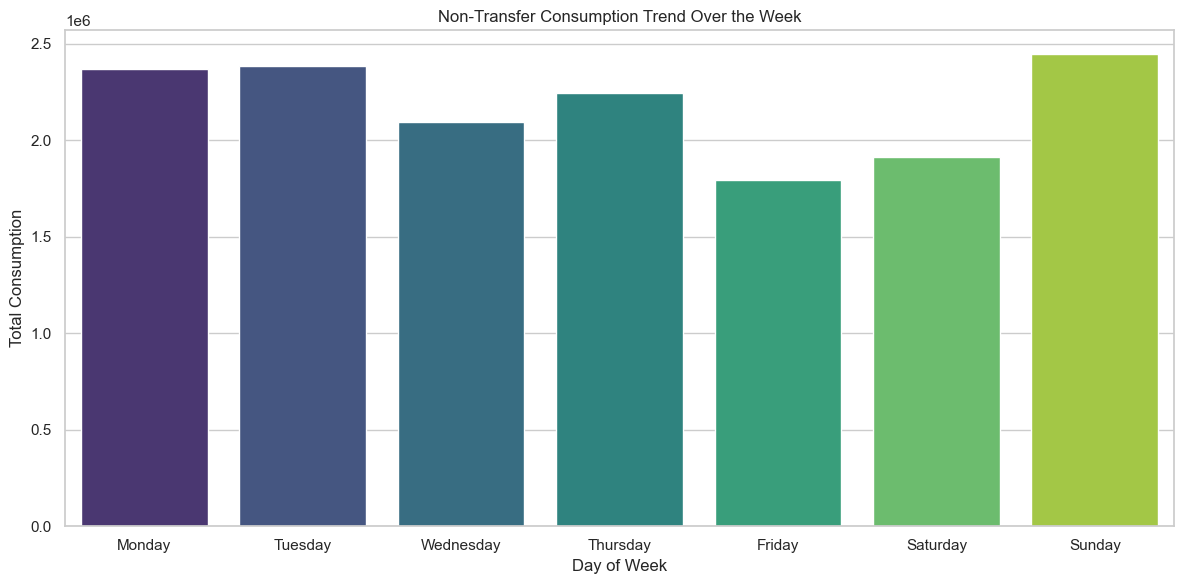

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract hour information from the Timestamp column
df['Hour'] = pd.to_datetime(df['Timestamp'], format='%H:%M').dt.hour
# Extract weekday information from the Date column
df['Weekday'] = df['Date'].dt.dayofweek  # Monday is 0, Sunday is 6

# Exclude transfer records
# Since both columns are of object type, ensure 'Third Party Account No' is a numeric string
# You can use the str.isdigit() function to check
df_non_transfers = df[~((df['Third Party Account No'].notna()) & (df['Third Party Name'].isna()))]

# Filter out consumption records (negative values) and convert them to positive values
consumption = df_non_transfers[df_non_transfers['Amount'] < 0].copy()
consumption['Amount'] = consumption['Amount'].abs()

# Aggregate consumption data by hour
hourly_consumption = consumption.groupby('Hour')['Amount'].sum()

# Aggregate consumption data by weekday
weekday_consumption = consumption.groupby('Weekday')['Amount'].sum()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the consumption trend over 24 hours
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_consumption.index, y=hourly_consumption.values, palette='coolwarm')
plt.title('Non-Transfer Consumption Trend Over 24 Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Total Consumption')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Plot the consumption trend over the week
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_consumption.index, y=weekday_consumption.values, palette='viridis')
plt.title('Non-Transfer Consumption Trend Over the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Consumption')
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(0, 7), day_labels)
plt.tight_layout()
plt.show()


In [12]:
df_non_transfers

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,YearMonth,Hour,Weekday
0,2023-01-01,00:00,678330503.0,2971.000000,1584.00,nan,Westport Care Home,2023-01,0.0,6.0
1,2023-01-01,00:00,472213568.0,3792.000000,1950.00,nan,Barbiee Boutique,2023-01,0.0,6.0
4,2023-01-01,00:00,624500124.0,3226.000000,1825.00,nan,Fat Face,2023-01,0.0,6.0
5,2023-01-01,00:00,203466392.0,4607.660000,2841.66,nan,Lavender Primary,2023-01,0.0,6.0
6,2023-01-01,00:00,768271776.0,3620.000000,1950.00,nan,A Cut Above,2023-01,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...
230591,2023-06-12,20:54,581655972.0,45935.206861,-41.06,nan,Tesco,2023-06,20.0,0.0
230592,2023-06-12,20:55,786141370.0,-244.837500,-62.35,nan,Sainsbury Local,2023-06,20.0,0.0
230593,2023-06-12,21:05,824916823.0,9709.172159,-32.94,nan,Deliveroo,2023-06,21.0,0.0
230594,2023-06-12,21:13,366550080.0,26834.165794,-19.25,nan,Amazon,2023-06,21.0,0.0


In [13]:
consumption

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,YearMonth,Hour,Weekday
495,2023-01-01,00:00,355733816.0,526.000000,664.00,nan,Halifax,2023-01,0.0,6.0
496,2023-01-01,00:00,472213568.0,2412.000000,600.00,nan,LBG,2023-01,0.0,6.0
497,2023-01-01,00:00,624500124.0,2572.000000,654.00,nan,LBG,2023-01,0.0,6.0
498,2023-01-01,00:00,203466392.0,3935.660000,672.00,nan,Halifax,2023-01,0.0,6.0
499,2023-01-01,00:00,768271776.0,2208.000000,632.00,nan,LBG,2023-01,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...
230591,2023-06-12,20:54,581655972.0,45935.206861,41.06,nan,Tesco,2023-06,20.0,0.0
230592,2023-06-12,20:55,786141370.0,-244.837500,62.35,nan,Sainsbury Local,2023-06,20.0,0.0
230593,2023-06-12,21:05,824916823.0,9709.172159,32.94,nan,Deliveroo,2023-06,21.0,0.0
230594,2023-06-12,21:13,366550080.0,26834.165794,19.25,nan,Amazon,2023-06,21.0,0.0
